# 1. Preparing environment

## 1.1 Installing packages

## 1.2 Adding source and path to find files (Google Colab)

In [1]:
import os
from google.colab import drive

In [2]:
drive.mount('/content/drive', force_remount=True)
path = "/content/drive/MyDrive/Voice of Nature/WP3/Csilla's Thesis coding"
os.chdir(path)

Mounted at /content/drive


## 1.3 Importing libraries

In [3]:
# loading libraries for tabular data handling
import pandas as pd
import numpy as np
import re

# loading libraries for visualising data
import matplotlib.pyplot as plt
import seaborn as sns

## 1.4 Defining functions

In [4]:
def countplot(data, x, order=None, hue=None, hue_order=None, ax=None, palette='Spectral', title='', show=True,):
    if hue is None:
        palette = None

    sns.countplot(data=data, x=x, order=order, hue=hue, hue_order=hue_order, palette=palette, ax=ax)

    if hue is not None:
        plt.legend(title=hue)

    plt.xticks(rotation=90)
    plt.title(title)

    # saving figure
    png_name = re.sub('- ', '', title.lower())
    png_name = re.sub(' ', '_', png_name)
    plt.savefig('240520_' + png_name + '.png')

    # show plot
    if show == True:
      plt.show()
    else:
      plt.close()











# 2. Loading & visualising data

## 2.1 Wishes data

In [5]:
wishes_df = pd.read_csv('wishes_translated_en.csv')
wishes_df.head(2)

,respondent_id,wkt,category,wish,comment
0,72het4dmv4k3,POINT (12.612999 55.717601),wild_nature,1,NaN
1,88pna6cwg8x6,POINT (12.617608 55.725923),wild_nature,1,"Animals The beauty, the calm."


In [6]:
wishes_df.pivot_table(index='category', columns='wish', values='respondent_id', aggfunc='count', margins=True)

wish,0,1,All
category,,,
facilities_other,74,518,592
lawns_flowers,405,479,884
other,120,90,210
social_areas,139,571,710
sports_facilities,285,407,692
wild_nature,136,2119,2255
All,1159,4184,5343


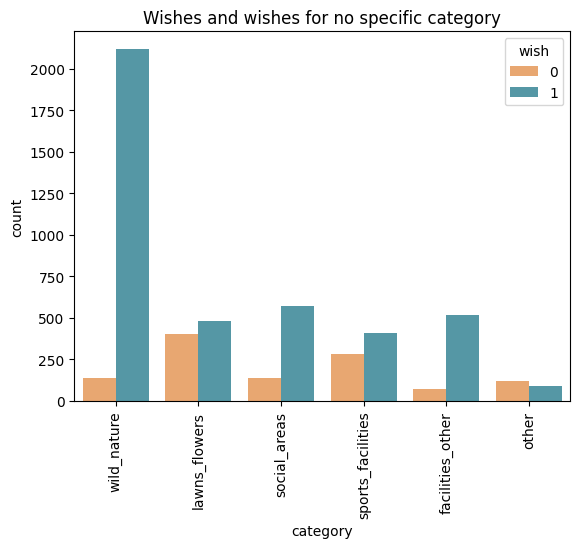

In [7]:
# potentially convert to wish-wish-for-no
countplot(wishes_df, 'category', hue='wish', palette=['#FCA55D', '#47A0B3'], title='Wishes and wishes for no specific category')

## 2.2 Demographic data

In [8]:
participants_df = pd.read_csv('participants_translated.csv')

# drop columns
participants_df = participants_df.drop(['nh_frequency', 'nh_activities_living',
                                        'nh_activities_work', 'nh_activities_errands',
                                        'nh_activities_shops', 'nh_activities_sports',
                                        'nh_activities_rec', 'nh_activities_social',
                                        'nh_activities_nature', 'nh_activities_other',
                                        'nh_activities_other_specified', 'nn_hac_nature',
                                        'nn_hac_outdoor_rec', 'nn_hac_experience',
                                        'nn_hac_housing', 'nn_hac_access',
                                        'sport_member_specified', 'enviro_member_specified',
                                        'current_occupation_other_specified',
                                        'language_other_specified'], axis=1)

# preprocess language data & drop suffluent columns
participants_df['danish_speaker'] = np.where(participants_df['language'].str.contains('da|da, en'), 1, 0)
participants_df = participants_df.drop(['language', 'language_danish', 'language_english',
       'language_german', 'language_swedish', 'language_arabic',
       'language_turkish', 'language_other'], axis=1)

participants_df.head(2)

,respondent_id,gender,age,nn_awareness,sports_member,enviro_member,children_under18,higher_edu,current_occupation,annual_income,wkt,danish_speaker
0,8sy4beg8kkh7,Man,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.575378 55.706844),0
1,2sm4ths4cub7,Woman,37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (12.575323 55.706751),0


In [9]:
len(participants_df)

4607

In [ ]:
(participants_df.count())/4607

respondent_id         1.000000
gender                0.873453
age                   0.731061
nn_awareness          0.570002
sports_member         0.510527
enviro_member         0.500109
children_under18      0.389190
higher_edu            0.387888
current_occupation    0.382461
annual_income         0.359236
wkt                   0.734317
danish_speaker        1.000000
dtype: float64

In [ ]:
participants_df.higher_edu.value_counts()/1787

higher_edu
Yes    0.825406
No     0.174594
Name: count, dtype: float64

In [ ]:
participants_df.danish_speaker.value_counts()/4607

danish_speaker
1    0.867376
0    0.132624
Name: count, dtype: float64

In [ ]:
participants_df.children_under18.value_counts()/1793

children_under18
No     0.78193
Yes    0.21807
Name: count, dtype: float64

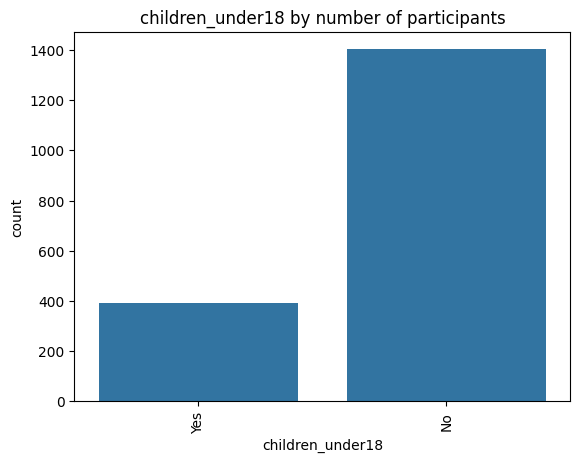

In [ ]:
countplot(participants_df, 'children_under18', order=['Yes', 'No'], title='children_under18 by number of participants')

In [ ]:
participants_df.current_occupation.value_counts()/1762

current_occupation
Employed           0.598184
Other              0.168558
Student            0.095914
Self-Employed      0.093076
Transfer income    0.044268
Name: count, dtype: float64

In [ ]:
participants_df.gender.value_counts()/4024

gender
Woman            0.577286
Man              0.413022
Non-disclosed    0.005964
Other            0.003728
Name: count, dtype: float64

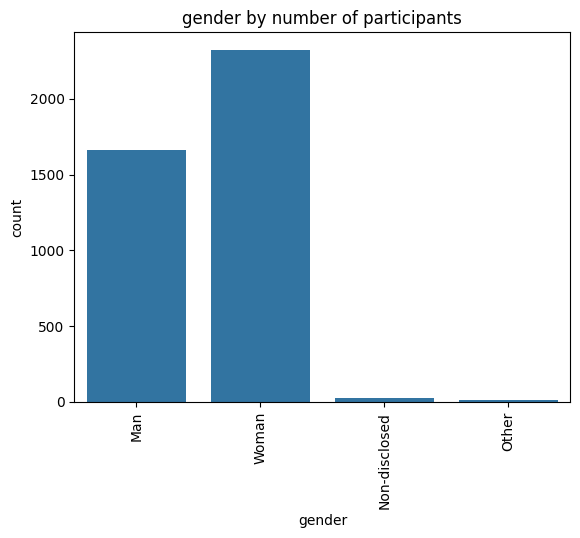

In [ ]:
countplot(participants_df, 'gender', title='gender by number of participants', order=['Man', 'Woman', 'Non-disclosed', 'Other'])

In [ ]:
sns.set_palette('crest')

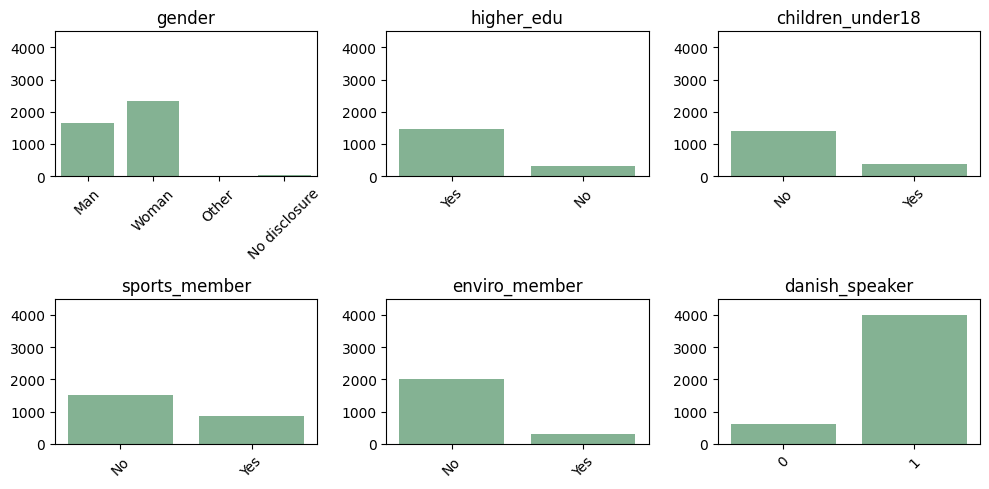

In [ ]:
# Define the number of rows and columns for the subplots grid
num_rows = 2  # Adjust as needed
num_cols = 3  # Adjust as needed

# Create a new figure and axes using subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over each column and create a countplot in each subplot
for i, col in enumerate(['gender', 'higher_edu', 'children_under18', 'sports_member', 'enviro_member', 'danish_speaker']):
    sns.countplot(data=participants_df, x=col, ax=axes[i])
    axes[i].set_title(col)  # Set subplot title
    axes[i].set_xlabel(None)  # Remove x-axis label to avoid overlap
    axes[i].set_ylabel(None)  # Remove y-axis label to avoid overlap

    # Set the y-axis limits (ylim) to be consistent across all subplots
    axes[i].set_ylim(0, 4500)  # Adjust max_value based on your data

    # Optionally, you can rotate the x-axis labels if needed
    plt.sca(axes[i])
    plt.xticks(rotation=45)  # Adjust rotation as needed

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

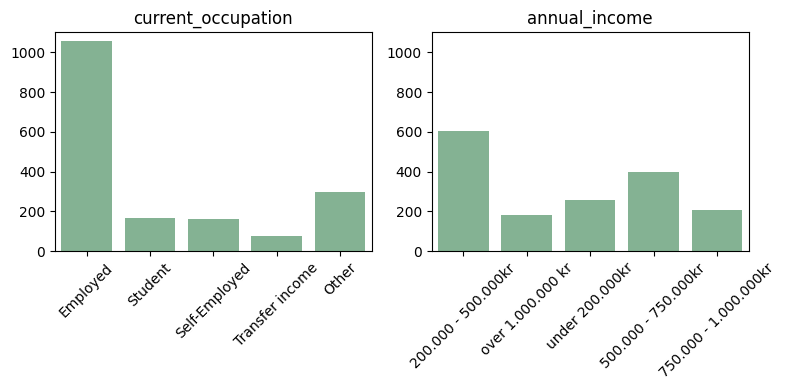

In [ ]:
# Define the number of rows and columns for the subplots grid
num_rows = 1  # Adjust as needed
num_cols = 2  # Adjust as needed

# Create a new figure and axes using subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over each column and create a countplot in each subplot
for i, col in enumerate(['current_occupation', 'annual_income']):
    sns.countplot(data=participants_df, x=col, ax=axes[i])
    axes[i].set_title(col)  # Set subplot title
    axes[i].set_xlabel(None)  # Remove x-axis label to avoid overlap
    axes[i].set_ylabel(None)  # Remove y-axis label to avoid overlap

    # Set the y-axis limits (ylim) to be consistent across all subplots
    axes[i].set_ylim(0, 1100)  # Adjust max_value based on your data

    # Optionally, you can rotate the x-axis labels if needed
    plt.sca(axes[i])
    plt.xticks(rotation=45)  # Adjust rotation as needed

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# remove age=0
participants_df[participants_df.age == 0] = np.nan

In [ ]:
(3368-participants_df.age.isna().sum())/3368

0.6270783847980997

In [ ]:
participants_df.age.dtype

dtype('float64')

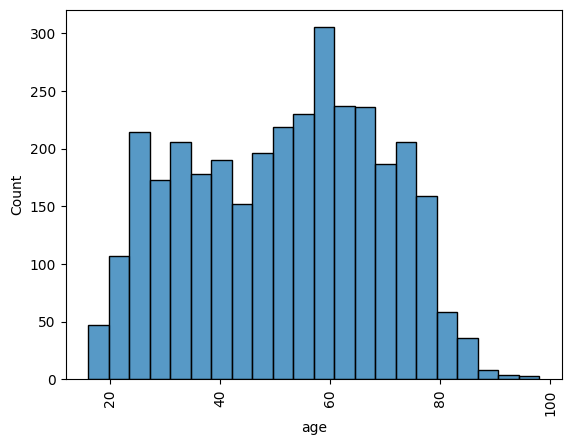

In [ ]:
sns.histplot(participants_df, x='age')
plt.xticks(rotation=90)
plt.savefig('240520_age.png')
plt.show()

# 3. Merging data & participants

In [10]:
merged_df = wishes_df.merge(participants_df, on='respondent_id')
merged_df.head()

,respondent_id,wkt_x,category,wish,comment,gender,age,nn_awareness,sports_member,enviro_member,children_under18,higher_edu,current_occupation,annual_income,wkt_y,danish_speaker
0,72het4dmv4k3,POINT (12.612999 55.717601),wild_nature,1,NaN,Woman,40.0,Yes,No,No,Yes,Yes,Employed,over 1.000.000 kr,POINT (12.581654 55.706155),1
1,88pna6cwg8x6,POINT (12.617608 55.725923),wild_nature,1,"Animals The beauty, the calm.",Woman,71.0,Yes,No,No,NaN,NaN,NaN,NaN,POINT (12.558491 55.705762),1
2,3zn6v4bl3jv3,POINT (12.615654 55.719123),wild_nature,1,North Sea-like forest that can cope with the c...,Man,23.0,Yes,No,No,NaN,NaN,NaN,NaN,POINT (12.586233 55.698421),1
3,9pa434wdz9h6,POINT (12.595512 55.70793),wild_nature,1,Lots of green Because there is absolutely no g...,Woman,26.0,No,No,No,No,Yes,Student,200.000 - 500.000kr,NaN,1
4,9cg9sjo9rjh7,POINT (12.612397 55.717152),wild_nature,1,Animals Keep greenery and nature as much as po...,Man,40.0,No,Yes,Yes,NaN,NaN,NaN,NaN,POINT (12.550627 55.716729),1


## 2.1 How are the participants represented?

In [ ]:
len(merged_df)

5342

In [ ]:
(merged_df.count())/5342

respondent_id         1.000000
wkt_x                 1.000000
category              1.000000
wish                  1.000000
comment               0.473231
gender                0.995694
age                   0.846312
nn_awareness          0.998877
sports_member         0.944964
enviro_member         0.931299
children_under18      0.767503
higher_edu            0.765444
current_occupation    0.755522
annual_income         0.721827
wkt_y                 0.933920
danish_speaker        1.000000
dtype: float64

In [ ]:
merged_df.count()

respondent_id         5342
wish                  5342
category              5342
description           3171
desc_topic            5342
reason                2672
reas_topic            5342
geometry              5342
dist_roads            5342
dist_green            5342
dist_waters           5342
dist_home             5342
gender                5319
age                   4521
nn_awareness          5336
sports_member         5048
enviro_member         4975
children_under18      4100
higher_edu            4089
current_occupation    4036
annual_income         3856
wkt                   4989
danish_speaker        5342
dtype: int64

In [ ]:
merged_df.nn_awareness.value_counts()/5336

nn_awareness
Yes    0.548351
No     0.451649
Name: count, dtype: float64

In [ ]:
merged_df.higher_edu.value_counts()/4089

higher_edu
Yes    0.847395
No     0.152605
Name: count, dtype: float64

In [ ]:
merged_df.danish_speaker.value_counts()/5342

danish_speaker
1.0    0.816735
0.0    0.183265
Name: count, dtype: float64

In [ ]:
merged_df.children_under18.value_counts()/4100

children_under18
No     0.788537
Yes    0.211463
Name: count, dtype: float64

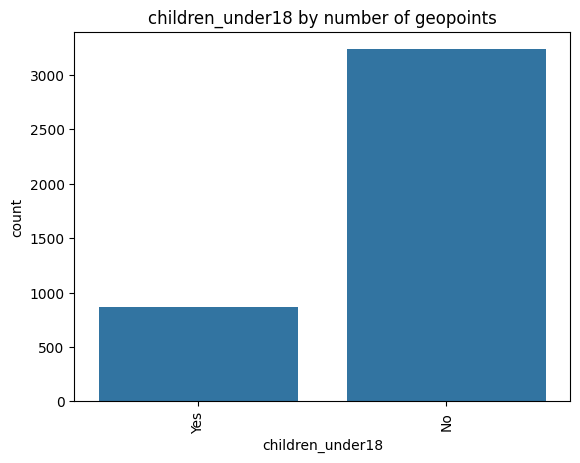

In [ ]:
countplot(merged_df, 'children_under18', title='children_under18 by number of geopoints', order=['Yes', 'No'])

In [ ]:
merged_df.gender.value_counts()/5319

gender
Woman            0.552171
Man              0.437676
Other            0.007332
No disclosure    0.002820
Name: count, dtype: float64

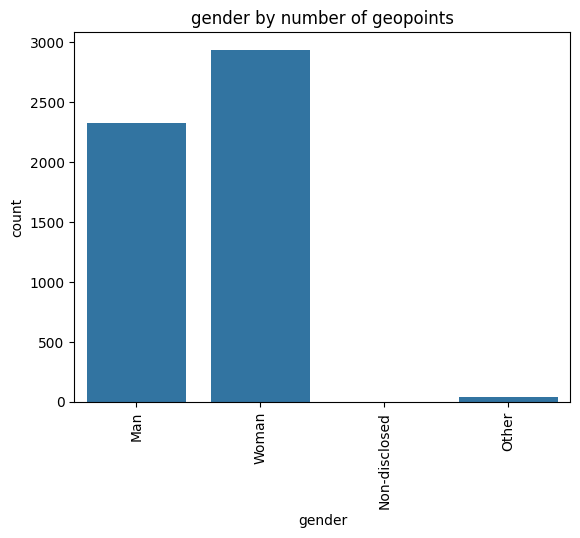

In [ ]:
countplot(merged_df, 'gender', title='gender by number of geopoints', order=['Man', 'Woman', 'Non-disclosed', 'Other'])

In [ ]:
participant_counts = merged_df['respondent_id'].value_counts()

In [ ]:
(participant_counts == 1).sum()

711

In [ ]:
(participant_counts >= 10).sum()

64

In [ ]:
type(participant_counts.index[:64])

pandas.core.indexes.base.Index

In [ ]:
most_frequent_respondents = participants_df[participants_df.respondent_id.isin(participant_counts.index[:64].tolist())]

In [ ]:
most_frequent_respondents.columns

Index(['respondent_id', 'gender', 'age', 'nn_awareness', 'sports_member',
       'enviro_member', 'children_under18', 'higher_edu', 'current_occupation',
       'annual_income', 'wkt', 'danish_speaker'],
      dtype='object')

In [ ]:
for i in ['gender', 'nn_awareness', 'sports_member',
       'enviro_member', 'children_under18', 'higher_edu', 'current_occupation',
       'annual_income', 'danish_speaker']:
  print(most_frequent_respondents[i].value_counts()/most_frequent_respondents.count()[i])

gender
Woman    0.603175
Man      0.396825
Name: count, dtype: float64
nn_awareness
Yes    0.65625
No     0.34375
Name: count, dtype: float64
sports_member
No     0.576271
Yes    0.423729
Name: count, dtype: float64
enviro_member
No     0.728814
Yes    0.271186
Name: count, dtype: float64
children_under18
No     0.811321
Yes    0.188679
Name: count, dtype: float64
higher_edu
Yes    0.830189
No     0.169811
Name: count, dtype: float64
current_occupation
Employed           0.615385
Self-Employed      0.173077
Student            0.096154
Other              0.076923
Transfer income    0.038462
Name: count, dtype: float64
annual_income
200.000 - 500.000kr      0.352941
500.000 - 750.000kr      0.274510
over 1.000.000 kr        0.137255
under 200.000kr          0.117647
750.000 - 1.000.000kr    0.117647
Name: count, dtype: float64
danish_speaker
1.0    0.75
0.0    0.25
Name: count, dtype: float64


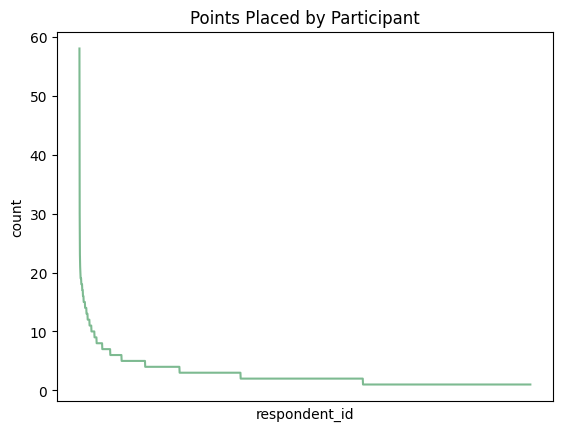

In [ ]:
sns.lineplot(merged_df['respondent_id'].value_counts())
plt.xticks([])
plt.title('Points Placed by Participant')
plt.show()

## 2.2 Visualising merged demographic variables

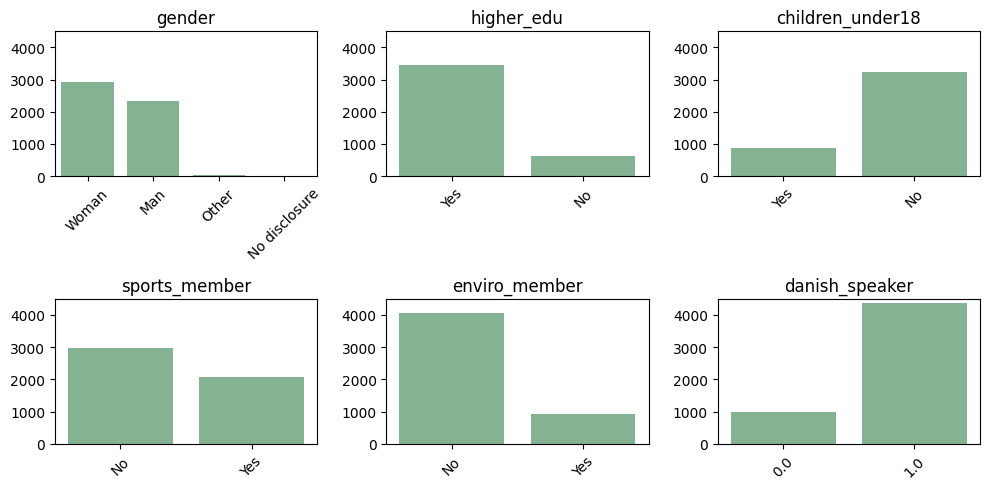

In [ ]:
# Define the number of rows and columns for the subplots grid
num_rows = 2  # Adjust as needed
num_cols = 3  # Adjust as needed

# Create a new figure and axes using subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over each column and create a countplot in each subplot
for i, col in enumerate(['gender', 'higher_edu', 'children_under18', 'sports_member', 'enviro_member', 'danish_speaker']):
    sns.countplot(data=merged_df, x=col, ax=axes[i])
    axes[i].set_title(col)  # Set subplot title
    axes[i].set_xlabel(None)  # Remove x-axis label to avoid overlap
    axes[i].set_ylabel(None)  # Remove y-axis label to avoid overlap

    # Set the y-axis limits (ylim) to be consistent across all subplots
    axes[i].set_ylim(0, 4500)  # Adjust max_value based on your data

    # Optionally, you can rotate the x-axis labels if needed
    plt.sca(axes[i])
    plt.xticks(rotation=45)  # Adjust rotation as needed

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# potentially fix hue order

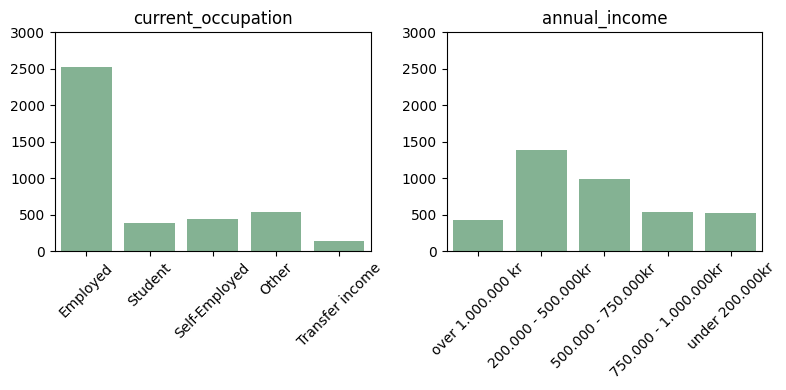

In [ ]:
# Define the number of rows and columns for the subplots grid
num_rows = 1  # Adjust as needed
num_cols = 2  # Adjust as needed

# Create a new figure and axes using subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4))

# Flatten the axes array to make it easier to iterate over
axes = axes.flatten()

# Iterate over each column and create a countplot in each subplot
for i, col in enumerate(['current_occupation', 'annual_income']):
    sns.countplot(data=merged_df, x=col, ax=axes[i])
    axes[i].set_title(col)  # Set subplot title
    axes[i].set_xlabel(None)  # Remove x-axis label to avoid overlap
    axes[i].set_ylabel(None)  # Remove y-axis label to avoid overlap

    # Set the y-axis limits (ylim) to be consistent across all subplots
    axes[i].set_ylim(0, 3000)  # Adjust max_value based on your data

    # Optionally, you can rotate the x-axis labels if needed
    plt.sca(axes[i])
    plt.xticks(rotation=45)  # Adjust rotation as needed

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# remove the age=0
participants_df[participants_df.age == 0] = np.nan

In [ ]:
(3368-participants_df.age.isna().sum())/3368

0.6270783847980997

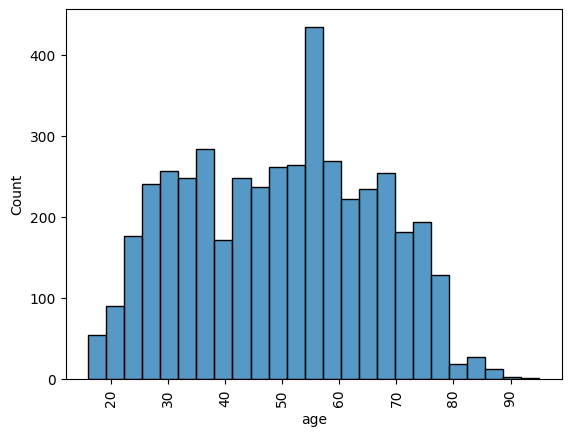

In [ ]:
sns.histplot(merged_df, x='age')
plt.xticks(rotation=90)
plt.savefig('240520_age_merged.png')
plt.show()

- compare it to Østerbro data

# 4. Categories per groups

## 4.1 Categories

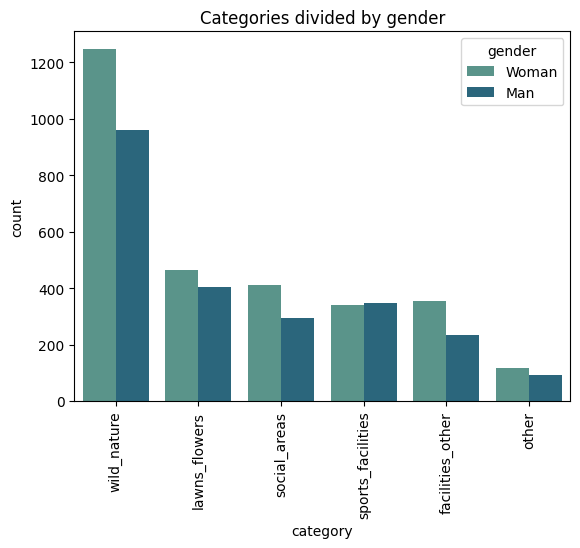

In [11]:
countplot(merged_df[(merged_df.gender == 'Man')|(merged_df.gender == 'Woman')], 'category', hue='gender', palette='crest', title='Categories divided by gender')

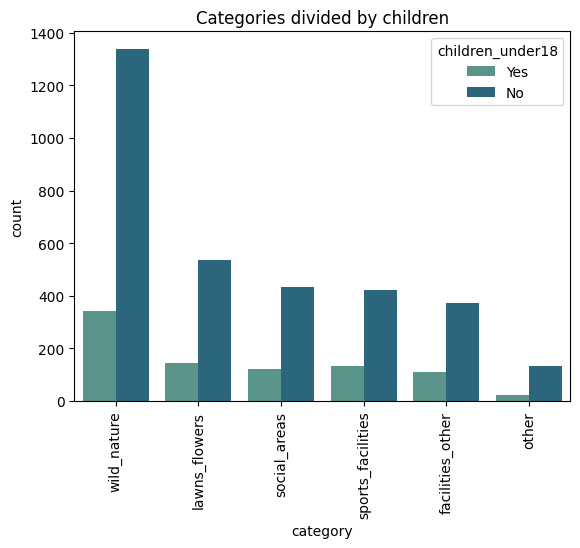

In [12]:
countplot(merged_df, 'category', hue='children_under18', palette='crest', title='Categories divided by children')

In [13]:
merged_df[(merged_df.gender == 'Man')|(merged_df.gender == 'Woman')].pivot_table(index='category', columns='gender', values='respondent_id', aggfunc='count', margins=True)

gender,Man,Woman,All
category,,,
facilities_other,232,355,587
lawns_flowers,405,465,870
other,92,118,210
social_areas,293,412,705
sports_facilities,346,340,686
wild_nature,960,1247,2207
All,2328,2937,5265


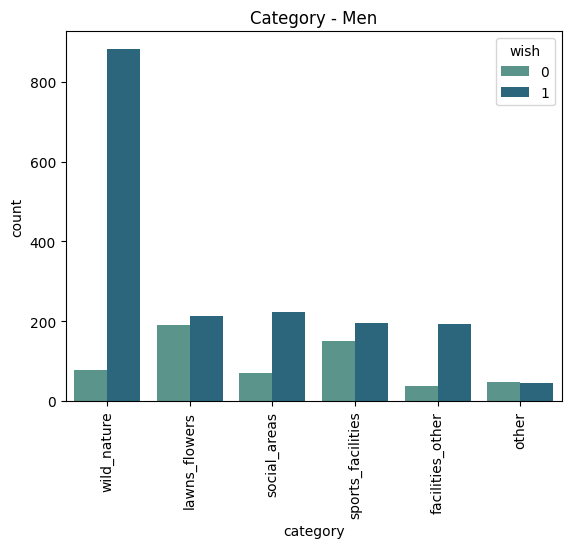

In [14]:
countplot(merged_df[(merged_df.gender == 'Man')], 'category', hue='wish', palette='crest', title='Category - Men')

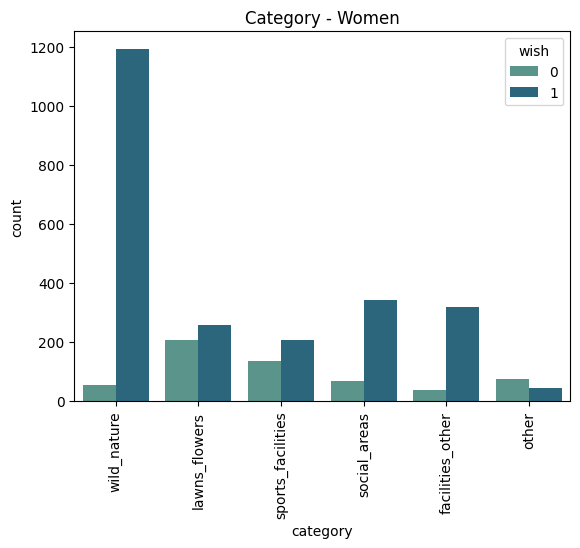

In [15]:
countplot(merged_df[(merged_df.gender == 'Woman')], 'category', hue='wish', palette='crest', title='Category - Women')

In [16]:
merged_df.pivot_table(index='category', columns='children_under18', values='respondent_id', aggfunc='count', margins=True)

children_under18,No,Yes,All
category,,,
facilities_other,371,109,480
lawns_flowers,537,143,680
other,133,21,154
social_areas,434,120,554
sports_facilities,420,133,553
wild_nature,1338,341,1679
All,3233,867,4100


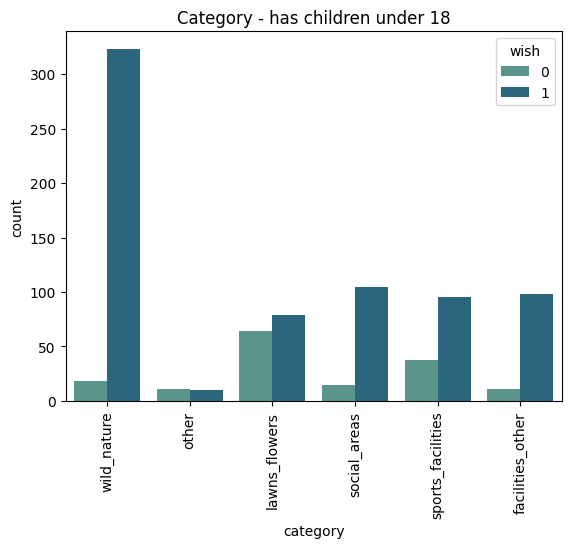

In [17]:
countplot(merged_df[(merged_df.children_under18 == 'Yes')], 'category', hue='wish', palette='crest', title='Category - has children under 18')

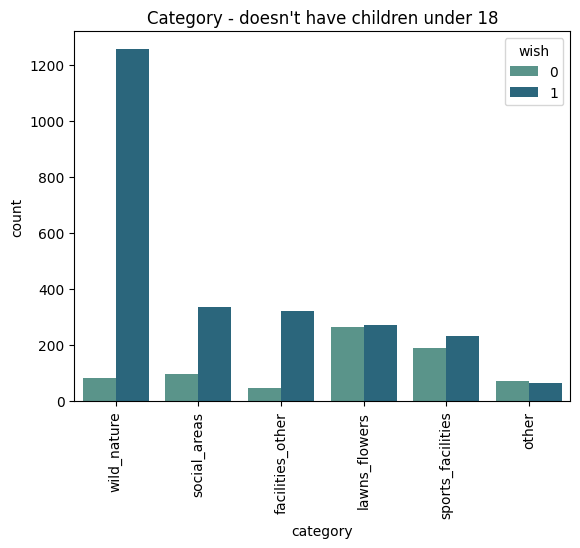

In [18]:
countplot(merged_df[(merged_df.children_under18 == 'No')], 'category', hue='wish', palette='crest', title="Category - doesn't have children under 18")

In [ ]:
for col in ['children_under18', 'gender']:
  print(col)
  pivot_table = merged_df.pivot_table(index='category', columns=col, values='respondent_id', aggfunc=['count'], margins=True)
  for i in range(len(merged_df[col].value_counts().dropna().index.unique())):
    j = pivot_table.columns[i]
    print(pivot_table[j]/pivot_table.iloc[-1].values[i])

children_under18
category
facilities_other     0.114754
lawns_flowers        0.166100
other                0.041138
social_areas         0.134241
sports_facilities    0.129910
wild_nature          0.413857
All                  1.000000
Name: (count, No), dtype: float64
category
facilities_other     0.125721
lawns_flowers        0.164937
other                0.024221
social_areas         0.138408
sports_facilities    0.153403
wild_nature          0.393310
All                  1.000000
Name: (count, Yes), dtype: float64
gender
category
facilities_other     0.099656
lawns_flowers        0.173969
other                0.039519
social_areas         0.125859
sports_facilities    0.148625
wild_nature          0.412371
All                  1.000000
Name: (count, Man), dtype: float64
category
facilities_other     0.133333
lawns_flowers        0.066667
other                     NaN
social_areas         0.066667
sports_facilities    0.066667
wild_nature          0.666667
All                  1.000

# Save merged dataframe and geojson

In [ ]:
merged_df.to_csv('merged.csv', index=False)

# Next up:
**Output data:** merged.csv
- 4-merged-content-analysis-17-05-2024